## Reasoning with continuous variables

Here we will use Bayes' rule in a coin flipping setting to derive the probability of a heads.  

The *Binomial* distribution
\begin{equation}
p(y | \theta, n) = {n \choose y} \theta^y (1 - \theta)^{n-y}
\end{equation}
describes the probability of getting $y$ heads out of $n$ trials with a heads probability of $\theta$.

Flip coins by sampling from a *Beroulli* distribution.

In [1]:
using Random, Distributions

In [2]:
θ = 0.25
n = 10
y = rand(Bernoulli(θ), n)

10-element Array{Int64,1}:
 1
 0
 0
 0
 1
 0
 0
 0
 1
 0

Calculate the probability of different numbers of heads using the Binomial distribution.

In [3]:
Bi = Binomial(n, θ)
pdf.(Bi, 0:10)

11-element Array{Float64,1}:
 0.056313514709472684  
 0.1877117156982422    
 0.2815675735473633    
 0.25028228759765625   
 0.14599800109863267   
 0.05839920043945312   
 0.01622200012207033   
 0.003089904785156247  
 0.00038623809814453147
 2.8610229492187517e-5 
 9.5367431640625e-7    

In [4]:
typeof(Bi)

Binomial{Float64}

In [5]:
# keep in mind index 1 is y=0
using Printf
for i=0:10
    @printf("%2d: %5.3f\n", i, pdf(Bi, i))
end

 0: 0.056
 1: 0.188
 2: 0.282
 3: 0.250
 4: 0.146
 5: 0.058
 6: 0.016
 7: 0.003
 8: 0.000
 9: 0.000
10: 0.000


What's the probability that we get more than $k$ heads?

$$
\sum_{i=k+1}^n p(i|\theta, n)
$$

In [6]:
k=5
sum(pdf.(Bi)[k+2:n+1])

┌ Warning: `pdf(d::DiscreteUnivariateDistribution)` is deprecated, use `pdf.(Ref(d), support(d))` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:582 [inlined]
└ @ Core ./broadcast.jl:582


0.0197277069091797

This can also be calculated with the cumulative distribution function (cdf):

In [7]:
1-cdf(Binomial(n, θ), k)

0.019727706909179688

In [8]:
using Plots

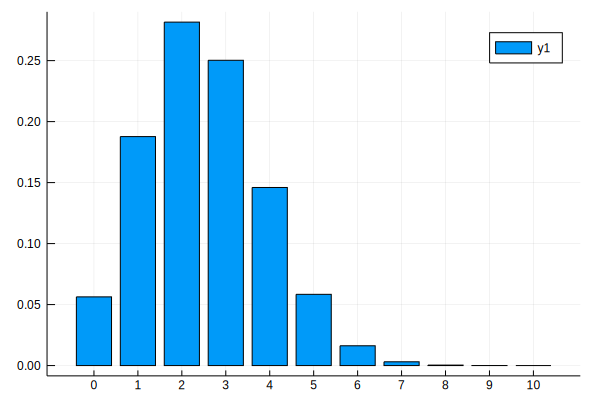

In [9]:
bar(0:10, pdf.(Bi, 0:10), xticks=0:10)

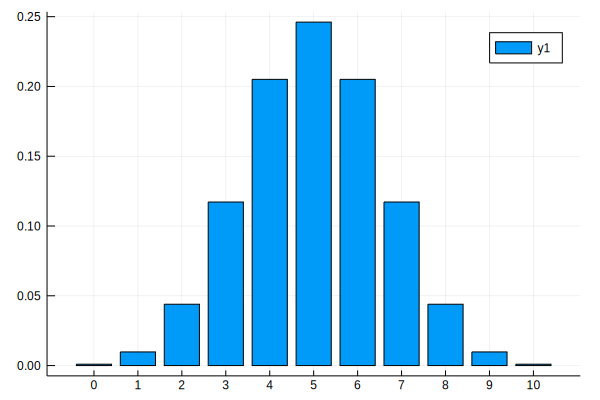

In [10]:
bar(0:10, pdf.(Binomial(n, 0.5), 0:10), xticks=0:10)

Aimate the pdf for different values of $\theta$ with the `Interact` package.

In [11]:
using Interact

# unicode doesn't seem to work..
@manipulate for θ = 0:0.05:1
    bar(0:10, pdf.(Binomial(n, θ), 0:10), 
        xticks=0:10, ylabel="p(y|theta,n=10)", legend=false)
end

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/044a5c6caca02c2536caef490e53eee76c25d906-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/044a5c6caca02c2536caef490e53eee76c25d906-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:θ=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
11,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45"  …  "0.55", "0.6", "0.65", "0.7", "0.75", "0.8", "0.85", "0.9", "0.95", "1.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.5",:value=>Observable{Float64} with 2 listeners. Value:
0.5), Observable{Float64} with 2 listeners. Value:
0.5, Scope("knockout-component-24eab4a5-17c5-42bc-bee8-1b7c81a9af77", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45"  …  "0.55", "0.6", "0.65", "0.7", "0.75", "0.8", "0.85", "0.9", "0.95", "1.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.5", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
11, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/mike/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/mike/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/mike/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/Users/mike/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/Users/mike/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.0\\\",\\\"0.05\\\",\\\"0.1\\\",\\\"0.15\\\",\\\"0.2\\\",\\\"0.

Suppose we want to estimate $\theta$ given $y$ heads in $n$ trials?  

We apply Bayes' rule:
$$
p(\theta|y,n) = \frac{p(y|\theta, n) p(\theta|n)}{p(y|n)}
$$

If we assume the prior $p(\theta)$ is *uninformative*, i.e. we have no a priori knowledge about $\theta$, then $p(\theta|n) = p(\theta) = 1$, and the posterior is just proportional to the likelihood:
$$
p(\theta|y,n) \propto p(y|\theta, n) \cdot 1
$$

In [12]:
# normalized but simple (overflows for large n due to overflow in binomial(n,y))
# COuld change to evaluate logf and convert back, but to use Beta (see below)
f(θ, y, n) = binomial(n, y) * θ^y * (1-θ)^(n-y) * (n+1)

θ = 0.25
y = 2
n = 10

r=0:0.1:1
f.(r, y, n) # f. = broadcast f over r

11-element Array{Float64,1}:
 0.0                  
 2.130812689500001    
 3.321888768000002    
 2.568218845499999    
 1.3302558719999997   
 0.4833984375         
 0.11678515200000006  
 0.015913705500000017 
 0.0008110079999999986
 4.0094999999999935e-6
 0.0                  

In [18]:
θ = 0.25
n = 10
trials = rand(Bernoulli(θ), n)

10-element Array{Int64,1}:
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0

In [14]:
sum(trials[1:6])

0

In [15]:
r=0:0.01:1
@manipulate for ntrials=0:n
    y = sum(trials[1:ntrials])
    plot(r, f.(r, y, ntrials), lw=4,
         ylabel="p(theta | y=$y, n=$ntrials)", legend=false)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:ntrials=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
5), Observable{Int64} with 2 listeners. Value:
5, Scope("knockout-component-d0cae1c3-c63e-4f23-bf0d-206be15dbf7a", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ntrials"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>0,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/mike/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/mike/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/mike/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/Users/mike/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/Users/mike/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":5}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-d0cae1c3-c63e-4f23-bf0d-206be15dbf7a\",\"id\":\"ob_10\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-d0cae1c3-c63e-4f23-bf0d-206be15dbf7a\",\"id\":\"ob_09\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = n

### Informative Priors



The beta distribution is a **conjugate prior** for the Binomial distribution: the product of the likelihood (Binomial) and the prior (Beta) yields another Beta distribution with different parameters (See Murphy 3.3).

$$
p(\theta|y,n) = \frac{p(y|\theta, n) p(\theta|n)}{p(y|n)}
$$

Neither the prior nor the normalizing constant depend on $n$, so we can write:
$$
p(\theta|y,n) = \frac{p(y|\theta, n) p(\theta)}{p(y)}
$$

The Beta is a conjugate prior for the Binomial, so the posterior will have the form:
$$
Beta(\theta | \alpha', \beta') = \frac{Binomial(y|\theta, n) Beta(\theta|\alpha, \beta)}{p(y)}
$$

It is straightforward to show the exact form:
$$
Beta(\theta | \alpha + y, \beta + n - y) = \frac{Binomial(y|\theta, n) Beta(\theta|\alpha, \beta)}{p(y)}
$$

We can interpret $\alpha$ and $\beta$ as additional "counts" before that bias the actual counts.

The beta distribution is defined by two parameters, $\alpha$ and $\beta$, and yields a wide range of distribution on the interval [0,1].

In [16]:
@manipulate for α=0.25:0.25:5, β=0.25:0.25:5
    plot(0:0.01:1, pdf.(Beta(α, β), 0:0.01:1), lw=4, legend=false)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:α=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
10,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.25", "0.5", "0.75", "1.0", "1.25", "1.5", "1.75", "2.0", "2.25", "2.5", "2.75", "3.0", "3.25", "3.5", "3.75", "4.0", "4.25", "4.5", "4.75", "5.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"2.5",:value=>Observable{Float64} with 2 listeners. Value:
2.5), Observable{Float64} with 2 listeners. Value:
2.5, Scope("knockout-component-100f4b4d-a95b-4bcc-8d3b-e8c6b82bdfe5", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>20,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.25", "0.5", "0.75", "1.0", "1.25", "1.5", "1.75", "2.0", "2.25", "2.5", "2.75", "3.0", "3.25", "3.5", "3.75", "4.0", "4.25", "4.5", "4.75", "5.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"2.5", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/mike/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/mike/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/mike/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/Users/mike/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/Users/mike/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.25\\\",\\\"0.5\\\",\\\"0.75\\\",\\\"1.0\\\",\\\"1.25\\\",\\\"1.5\\\"

Now we can redo the posterior using the Beta prior.

In [52]:
θ = 0.25
totaln = 1000
trials = rand(Bernoulli(θ), totaln)

1000-element Array{Int64,1}:
 1
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 1
 0
 ⋮
 1
 0
 0
 0
 0
 0
 1
 0
 0
 1
 0
 1

In [53]:
α=2
β=2
r=0:0.001:1
@manipulate for n=0:10:totaln
    y = sum(trials[1:n])
    plot(r, pdf.(Beta(α+y, β+n-y), r), lw=4,
         ylabel="p(theta | y=$y, n=$n, alpha=$α, beta=$β)", legend=false)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:n=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
500), Observable{Int64} with 2 listeners. Value:
500, Scope("knockout-component-f1933afe-047a-414d-8ad5-b28f78a732bf", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>1000,:min=>0,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>10,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
500, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/mike/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/mike/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/mike/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/Users/mike/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/Users/mike/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":500}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-f1933afe-047a-414d-8ad5-b28f78a732bf\",\"id\":\"ob_140\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-f1933afe-047a-414d-8ad5-b28f78a732bf\",\"id\":\"ob_139\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = 